# Aprendizagem Automática Avançada - Assignment 6
# Cláudia Afonso nº 36273 & Rita Rodrigues nº 54859

## Problem 1

**Consider the following reference model presented in the tutorial for solving the following problems.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import PIL
import pathlib

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization

In [2]:
# Importing the dataset

import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

228813984/228813984 [==============================] - 14s 0us/step


In [3]:
# Loading the data

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [4]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [5]:
# Configuring the dataset for performance

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
# Using data augmentation

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [7]:
# Reference model with data augmentation and dropout of 20%

num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [8]:
# Compiling the reference model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
# Viewing the layers of the reference model

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [10]:
# Training the reference model

epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 34s 320ms/step - loss: 1.2460 - accuracy: 0.4649 - val_loss: 1.1125 - val_accuracy: 0.5777
Epoch 2/15
92/92 [==============================] - 29s 315ms/step - loss: 1.0106 - accuracy: 0.6049 - val_loss: 1.0120 - val_accuracy: 0.5913
Epoch 3/15
92/92 [==============================] - 30s 322ms/step - loss: 0.9186 - accuracy: 0.6424 - val_loss: 0.8730 - val_accuracy: 0.6553
Epoch 4/15
92/92 [==============================] - 30s 325ms/step - loss: 0.8553 - accuracy: 0.6669 - val_loss: 0.9592 - val_accuracy: 0.6253
Epoch 5/15
92/92 [==============================] - 31s 333ms/step - loss: 0.8035 - accuracy: 0.6877 - val_loss: 0.8508 - val_accuracy: 0.6676
Epoch 6/15
92/92 [==============================] - 31s 341ms/step - loss: 0.7505 - accuracy: 0.7112 - val_loss: 0.8231 - val_accuracy: 0.6717
Epoch 7/15
92/92 [==============================] - 31s 335ms/step - loss: 0.7516 - accuracy: 0.7119 - val_loss: 0.8078 - val_accuracy: 0.6812

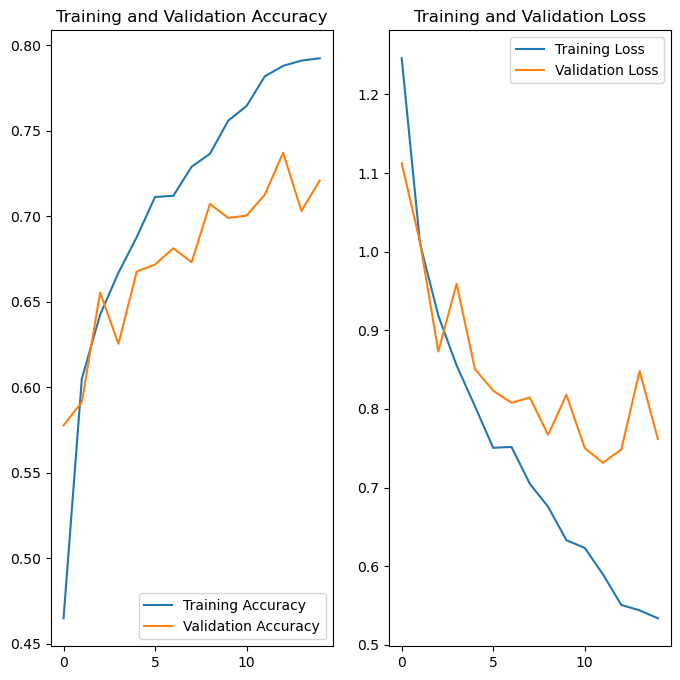

In [11]:
# Visualizing the results of the reference model

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

From the results above, it is possible to see that the reference model is reasonably accurate at predicting the target variable on the training dataset, since the training accuracy increases with the number of epochs, reaching a value of approximately 0.80 with 15 epochs. In addition, the training loss decreases as the number of epochs increases, which means that the model is minimizing the loss fuction during the training. For the validation set, the accuracy is not as good but still considerable, reaching a value of slightly above 0.7 as the number of epochs is increased to 15. In addition, the validation loss also decreases as the number of epochs increases to 15.

## Problem 1

<h3>Create 4 different models, one at a time, by modifying the reference model in the following manner:</h3>

<h4>i) Using the mean squared error as a loss function.</h4>

In [12]:
# Reference model

num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [13]:
# Compiling the model with the mean squared error as a loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(
              name='mean_squared_error'),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [15]:
# Training the model

epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 29s 306ms/step - loss: 1.6566 - accuracy: 0.1921 - val_loss: 1.2904 - val_accuracy: 0.1798
Epoch 2/15
92/92 [==============================] - 28s 309ms/step - loss: 1.2951 - accuracy: 0.1812 - val_loss: 1.4221 - val_accuracy: 0.1757
Epoch 3/15
92/92 [==============================] - 29s 317ms/step - loss: 1.2551 - accuracy: 0.1975 - val_loss: 1.2208 - val_accuracy: 0.1989
Epoch 4/15
92/92 [==============================] - 29s 311ms/step - loss: 1.2034 - accuracy: 0.1972 - val_loss: 1.1968 - val_accuracy: 0.1744
Epoch 5/15
92/92 [==============================] - 28s 309ms/step - loss: 1.1384 - accuracy: 0.2108 - val_loss: 1.1424 - val_accuracy: 0.1717
Epoch 6/15
92/92 [==============================] - 28s 307ms/step - loss: 1.1382 - accuracy: 0.2091 - val_loss: 1.0591 - val_accuracy: 0.2411
Epoch 7/15
92/92 [==============================] - 28s 308ms/step - loss: 1.0507 - accuracy: 0.2020 - val_loss: 1.0859 - val_accuracy: 0.2044

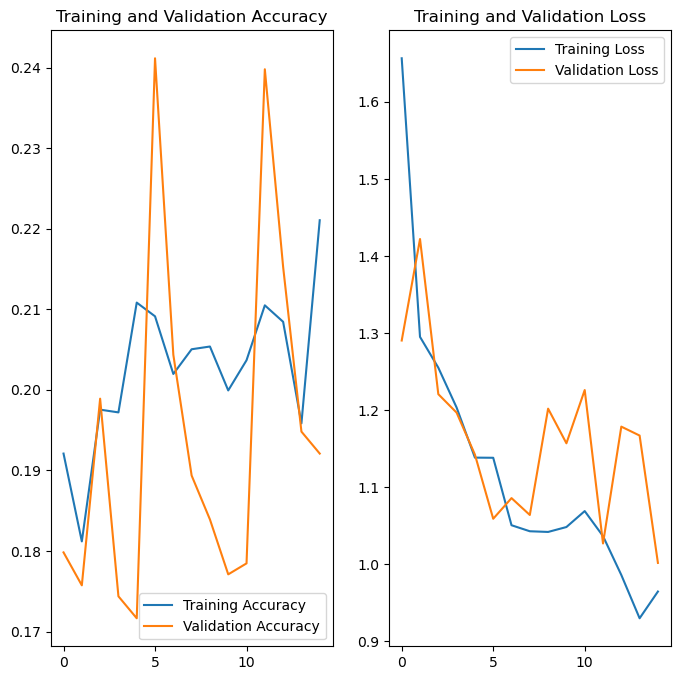

In [16]:
# Visualizing the results of the model

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Using the mean squared error as a loss function, the model is quite poor at predicting the target variable on the training and validation datasets, since the accuracy in both cases is quite low, oscillating between 0.19 and 0.22 as the number of epochs is increased to 15. This indicates that the loss function best suited for the classification problem at hand is the SparseCategoricalCrossentropy rather than MeanSquareError.

<h4>ii) Using a dropout probability of 40%</h4>

In [17]:
# Reference model with a dropout probability of 40%

num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [20]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 29s 309ms/step - loss: 1.3453 - accuracy: 0.4268 - val_loss: 1.0824 - val_accuracy: 0.5695
Epoch 2/15
92/92 [==============================] - 29s 312ms/step - loss: 1.1071 - accuracy: 0.5446 - val_loss: 1.0086 - val_accuracy: 0.5940
Epoch 3/15
92/92 [==============================] - 28s 308ms/step - loss: 0.9876 - accuracy: 0.6083 - val_loss: 1.1472 - val_accuracy: 0.5586
Epoch 4/15
92/92 [==============================] - 30s 327ms/step - loss: 0.9350 - accuracy: 0.6298 - val_loss: 0.9166 - val_accuracy: 0.6226
Epoch 5/15
92/92 [==============================] - 30s 331ms/step - loss: 0.8589 - accuracy: 0.6781 - val_loss: 1.0179 - val_accuracy: 0.6403
Epoch 6/15
92/92 [==============================] - 30s 329ms/step - loss: 0.7868 - accuracy: 0.6921 - val_loss: 0.9415 - val_accuracy: 0.6349
Epoch 7/15
92/92 [==============================] - 29s 317ms/step - loss: 0.7618 - accuracy: 0.6996 - val_loss: 0.7996 - val_accuracy: 0.6771

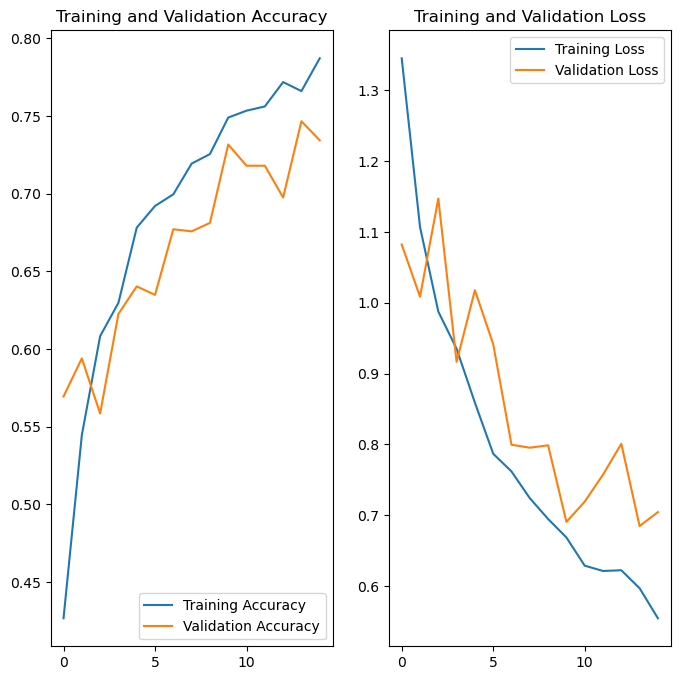

In [21]:
# Visualizing the results of the model

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

By using a dropout probability of 40%, there is almost difference from this model and the reference model (with a dropout probability of 20%). The model with a dropout probability of 40% is as accurate at predicting the target variable on the training dataset as was the reference model, reaching a value of approximately 0.80 with 15 epochs. In addition, the training loss decreases as the number of epochs increases, which means that the model is minimizing the loss fuction during the training. The results obtained for the validation set using the reference model with a dropout probability of 40% are also comparable to those obtained when using the same model with a dropout probability of 20% to the same validation set.

<h4>iii) Using a batch size of 8.</h4>

In [22]:
# Loading the data with a batch_size of 8

batch_size = 8
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [23]:
# Configuring the dataset for performance

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [24]:
# Reference model

num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [27]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
367/367 [==============================] - 50s 128ms/step - loss: 1.3198 - accuracy: 0.4278 - val_loss: 1.2009 - val_accuracy: 0.4728
Epoch 2/15
367/367 [==============================] - 47s 127ms/step - loss: 1.0283 - accuracy: 0.5909 - val_loss: 1.0593 - val_accuracy: 0.5831
Epoch 3/15
367/367 [==============================] - 46s 125ms/step - loss: 0.9168 - accuracy: 0.6441 - val_loss: 0.9390 - val_accuracy: 0.6322
Epoch 4/15
367/367 [==============================] - 45s 122ms/step - loss: 0.8277 - accuracy: 0.6788 - val_loss: 0.8385 - val_accuracy: 0.6771
Epoch 5/15
367/367 [==============================] - 46s 124ms/step - loss: 0.7830 - accuracy: 0.7037 - val_loss: 0.8047 - val_accuracy: 0.6757
Epoch 6/15
367/367 [==============================] - 45s 122ms/step - loss: 0.7502 - accuracy: 0.7214 - val_loss: 0.7855 - val_accuracy: 0.6989
Epoch 7/15
367/367 [==============================] - 44s 121ms/step - loss: 0.7067 - accuracy: 0.7319 - val_loss: 0.7570 - val_ac

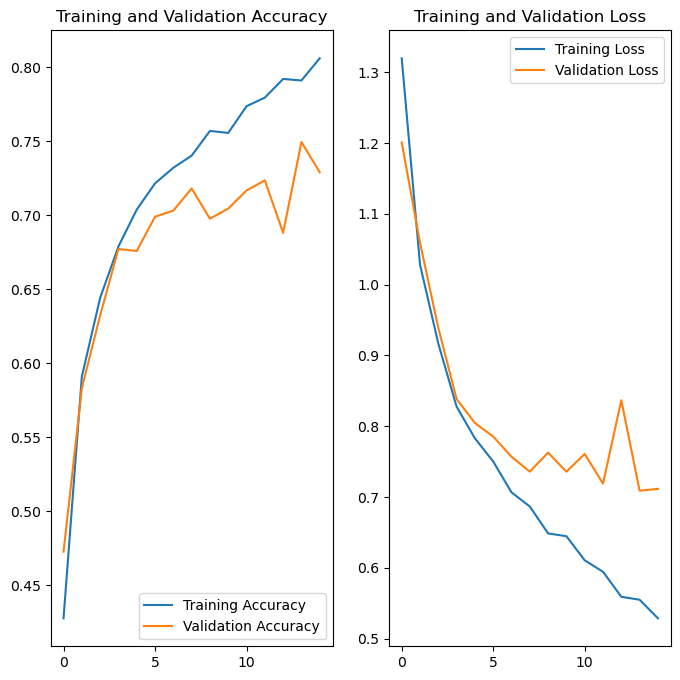

In [28]:
# Visualizing the results of the model

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Batch size is hyperparameter that determines the number of training examples used in each forward and backward pass during the training of a deep neural network. The choice of batch size can have a significant impact on the training process and the performance of the network. For instance, it can affect the speed of training, with smaller batch sizes requiring more iterations to process the same number of examples, thereby slowing down training. 

When using the reference model with a batch size of 8, there is almost no difference in training and validation accuracies when comparing to the reference model which used a value of 32 for this parameter. Both are reasonably accurate at predicting the target variable on the training and validation sets. However, the time of each epoch was approximately 10 to 15 seconds higher for the model with a batch size of 8 than for the reference model with a batch size of 32.

<h4>iv) Using batch normalization </h4>

In [29]:
# Loading the data with the original value of batch_size

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [30]:
# Configuring the dataset for performance

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [31]:
# Reference model with batch normalization

num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.BatchNormalization(),  
  layers.Dense(num_classes, name="outputs")
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [34]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 33s 327ms/step - loss: 1.2413 - accuracy: 0.5020 - val_loss: 1.2681 - val_accuracy: 0.4523
Epoch 2/15
92/92 [==============================] - 30s 325ms/step - loss: 1.0245 - accuracy: 0.6015 - val_loss: 1.4282 - val_accuracy: 0.4905
Epoch 3/15
92/92 [==============================] - 29s 320ms/step - loss: 0.9397 - accuracy: 0.6349 - val_loss: 1.0617 - val_accuracy: 0.6131
Epoch 4/15
92/92 [==============================] - 29s 314ms/step - loss: 0.8864 - accuracy: 0.6649 - val_loss: 1.2161 - val_accuracy: 0.5218
Epoch 5/15
92/92 [==============================] - 28s 309ms/step - loss: 0.8282 - accuracy: 0.6965 - val_loss: 1.3296 - val_accuracy: 0.5490
Epoch 6/15
92/92 [==============================] - 29s 317ms/step - loss: 0.7914 - accuracy: 0.6928 - val_loss: 0.8492 - val_accuracy: 0.6798
Epoch 7/15
92/92 [==============================] - 30s 322ms/step - loss: 0.7559 - accuracy: 0.7105 - val_loss: 0.9144 - val_accuracy: 0.6717

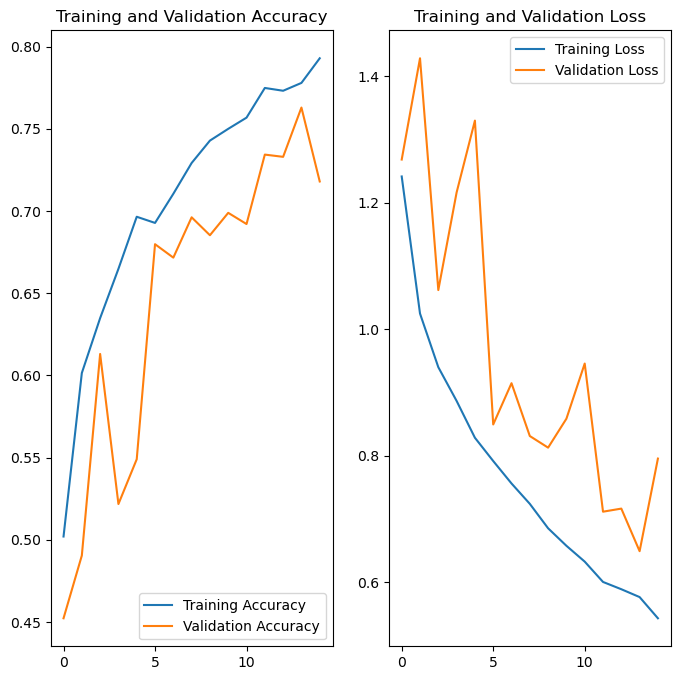

In [35]:
# Visualizing the results of the model with batch normalization

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Batch normalization is a widely used technique to reduce the number of epochs required to train deep networks, thereby accelerating the learning process.

When using a batch normalization layer in the reference model, there is again almost no difference from the results obtained for the reference model (where this layer was absent). Both models are reasonably accurate at predicting the target variable on the training and validation sets. Again, the loss function is being minimized as the number of epochs is increased to 15.

<h4>v) Combine modifications ii, iii and iv.</h4>

In [36]:
# Loading the data with a batch_size of 8

batch_size = 8
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [37]:
# Configuring the dataset for performance

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [38]:
# Using batch normalization and dropout probability of 40%

num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.BatchNormalization(),  
  layers.Dense(num_classes, name="outputs")
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [41]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
367/367 [==============================] - 41s 106ms/step - loss: 1.3053 - accuracy: 0.4574 - val_loss: 1.3032 - val_accuracy: 0.4728
Epoch 2/15
367/367 [==============================] - 39s 106ms/step - loss: 1.1204 - accuracy: 0.5463 - val_loss: 1.1539 - val_accuracy: 0.5232
Epoch 3/15
367/367 [==============================] - 41s 110ms/step - loss: 1.0200 - accuracy: 0.5967 - val_loss: 2.0480 - val_accuracy: 0.4332
Epoch 4/15
367/367 [==============================] - 40s 109ms/step - loss: 0.9959 - accuracy: 0.6029 - val_loss: 0.8647 - val_accuracy: 0.6935
Epoch 5/15
367/367 [==============================] - 39s 107ms/step - loss: 0.9306 - accuracy: 0.6339 - val_loss: 0.9120 - val_accuracy: 0.6703
Epoch 6/15
367/367 [==============================] - 38s 105ms/step - loss: 0.8878 - accuracy: 0.6580 - val_loss: 0.9684 - val_accuracy: 0.6689
Epoch 7/15
367/367 [==============================] - 39s 105ms/step - loss: 0.9056 - accuracy: 0.6543 - val_loss: 0.8394 - val_ac

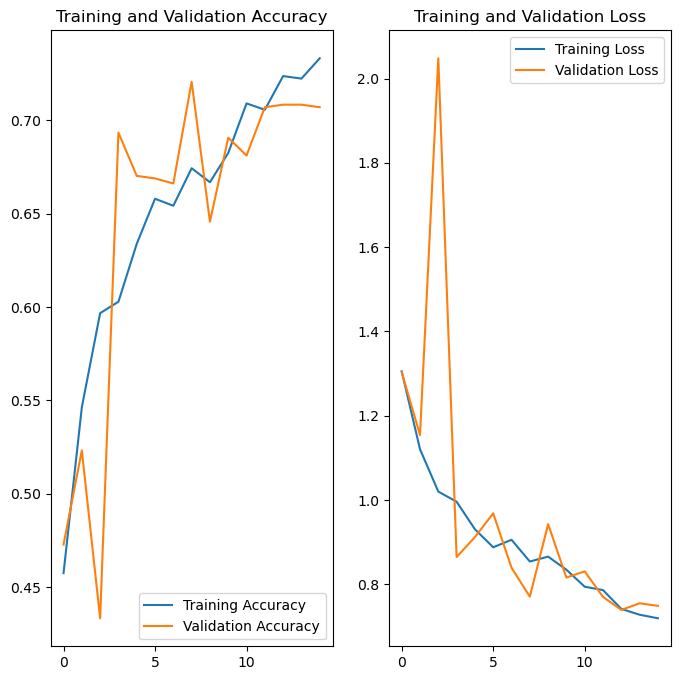

In [42]:
# Visualizing the results of the model

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

By using a dropout probability of 40%, a batch size of 8 and a batch normalization layer in the model, the results were again comparable to those obtained for the reference model (in which the dropout probability is 20%, the batch size is 32 and no batch normalization layer exists). Both models are reasonably accurate at predicting the target variable on the training and validation sets. Again, the loss function is being minimized as the number of epochs is increased to 15.

Overall, the reference model with a dropout probability of 20% and a batch size of 32 is already reasonably accurate and increasing the first parameter to 40% and decreasing the latter parameter to 8 while placing a batch normalization layer did not yield any observable advantage in terms of training time or accuracy. In fact, the time of each epoch for the model increased approximately 10 seconds compared with the reference model with a batch size of 32.